In [137]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traindf, testdf = pd.read_csv('./data/book_ratings_train.csv'), pd.read_csv('./data/book_ratings_test.csv')
print ('traindf', len(traindf))
print ('testdf', len(testdf))

traindf 260202
train 260202


In [3]:
userdf = pd.read_csv('./data/users.csv')
bookdf = pd.read_csv('./data/books.csv')
ir_df = pd.read_csv('./data/implicit_ratings.csv')

In [247]:
ttt = pd.concat([traindf.copy(), testdf.copy()])
ttt.head()

260202 173469


,Book-Rating,ISBN,User-ID
0,8.0,1550372289,153d612c88
1,10.0,030796017X,f73f18a13a
2,8.0,014028009,02e87fe603
3,10.0,0345413350,be36e5b8cb
4,9.0,0609600788,98ec1c54b5


In [6]:
user_dic = {}
for row in userdf.values:
    userid, loc, age = row
    user_dic[userid] = (loc, age)

In [248]:
ages = []
locs = []
for userid in ttt['User-ID']:
    loc, age = user_dic[userid]
    if age > 100 or age <= 0:
        age = float('nan')
    ages.append(age)
    locs.append(loc)

ttt['age'] = ages#preprocess(np.array(ages))
ttt['loc'] = locs

In [176]:
ttt.head()

,Book-Rating,ISBN,User-ID,age,loc
0,8.0,1550372289,153d612c88,47.0,"toronto, ontario, canada"
1,10.0,030796017X,f73f18a13a,NaN,"lake wales, florida, usa"
2,8.0,014028009,02e87fe603,29.0,"delft, zuid holland, netherlands"
3,10.0,0345413350,be36e5b8cb,NaN,"rochester, new york, usa"
4,9.0,0609600788,98ec1c54b5,45.0,"hummelstown, pennsylvania, usa"


In [9]:
book_dic = {}
for row in bookdf[['ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher']].values:
    isbn, auth, year, pub = row
    book_dic[isbn] = (auth, year, pub)

In [249]:
auths = []
years = []
pubs = []
for i in ttt['ISBN']:
    if i in book_dic:
        auth, year, pub = book_dic[i]
        auths.append(auth)
        years.append(str(year))
        pubs.append(pub)
    else:
        auths.append(float('nan'))
        years.append(float('nan'))
        pubs.append(float('nan'))

ttt['author'] = auths
ttt['years'] = years#preprocess(np.array(years))
ttt['publisher'] = pubs

In [250]:
print (len(ttt))
print (ttt.isnull().any(), '\n', ttt.isnull().sum()/ttt.isnull().count()*100)
ttt.head()

433671
Book-Rating     True
ISBN           False
User-ID        False
age             True
loc            False
author          True
years           True
publisher       True
dtype: bool 
 Book-Rating    40.000138
ISBN            0.000000
User-ID         0.000000
age            29.888787
loc             0.000000
author         11.487971
years          11.487741
publisher      11.488202
dtype: float64


,Book-Rating,ISBN,User-ID,age,loc,author,years,publisher
0,8.0,1550372289,153d612c88,47.0,"toronto, ontario, canada",Michael Kusugak,1992,Annick Press
1,10.0,030796017X,f73f18a13a,NaN,"lake wales, florida, usa",MERCER MAYER,2001,Golden Books
2,8.0,014028009,02e87fe603,29.0,"delft, zuid holland, netherlands",NaN,NaN,NaN
3,10.0,0345413350,be36e5b8cb,NaN,"rochester, new york, usa",PHILIP PULLMAN,1997,Del Rey
4,9.0,0609600788,98ec1c54b5,45.0,"hummelstown, pennsylvania, usa",DEEPAK CHOPRA,2000,Harmony


In [219]:
ttt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 0 to 173468
Data columns (total 8 columns):
Book-Rating    433671 non-null float64
ISBN           433671 non-null object
User-ID        433671 non-null object
age            433671 non-null float64
loc            433671 non-null object
author         433671 non-null object
years          433671 non-null object
publisher      433671 non-null object
dtypes: float64(2), object(6)
memory usage: 29.8+ MB


In [ ]:
ttt.to_csv('merge_.csv', index=False)

In [220]:
for col in ttt.select_dtypes(include=['object']).columns:
    ttt[col] = ttt[col].astype('category')
    
# Encoding categorical features
for col in ttt.select_dtypes(include=['category']).columns:
    ttt[col] = ttt[col].cat.codes

ttt.head()

,Book-Rating,ISBN,User-ID,age,loc,author,years,publisher
0,8.0,133745,6329,47.0,18959,41855,81,560
1,10.0,21147,75160,0.0,9894,37869,90,4132
2,8.0,13559,886,29.0,4962,62104,105,11567
3,10.0,31266,57887,0.0,15860,45272,86,2678
4,9.0,80349,46556,45.0,8588,11258,89,4553


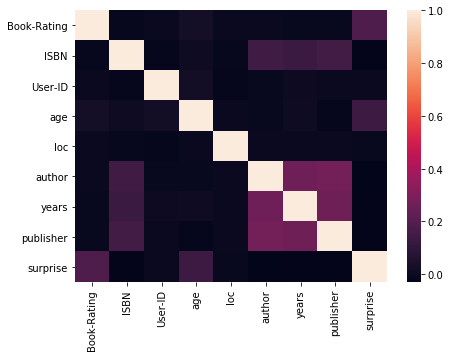

In [235]:
import seaborn as sns
plt.figure(figsize=[7,5])
sns.heatmap(ttt.corr())
plt.show()